In [1]:
import torch
print(torch.cuda.is_available())

False


In [2]:
# define target function
def fstar(X):
    return (X[:, 0] * X[:, 1] * (X[:, 5] > 0)).unsqueeze(-1)

In [3]:
# create low rank data
n = 2000
d = 20
X_train = torch.randn(size=(n,d)) * 0.5 
X_test = torch.randn(size=(n,d)) * 0.5 

y_train = fstar(X_train)
y_test = fstar(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([2000, 20]) torch.Size([2000, 20]) torch.Size([2000, 1]) torch.Size([2000, 1])


In [9]:
from rfm import LaplaceRFM, GeneralizedLaplaceRFM

In [15]:
model = LaplaceRFM(device='cpu', reg=1e-9, bandwidth=10, iters=5)

In [16]:
model.fit((X_train, y_train), 
            (X_test, y_test), 
            iters=5, 
            classification=False,
            )
M = model.M

Round 0, Test MSE: 0.0162
Using batch size of 134016
Sampling AGOP on 134016 total points


  0%|          | 0/1 [00:00<?, ?it/s]

Round 1, Test MSE: 0.0091
Using batch size of 134016
Sampling AGOP on 134016 total points


  0%|          | 0/1 [00:00<?, ?it/s]

Round 2, Test MSE: 0.0052
Using batch size of 134016
Sampling AGOP on 134016 total points


  0%|          | 0/1 [00:00<?, ?it/s]

Round 3, Test MSE: 0.0041
Using batch size of 134016
Sampling AGOP on 134016 total points


  0%|          | 0/1 [00:00<?, ?it/s]

Round 4, Test MSE: 0.0037
Using batch size of 134016
Sampling AGOP on 134016 total points


  0%|          | 0/1 [00:00<?, ?it/s]

Final MSE: 0.0036


We have run five steps of RFM, returning the M matrix

In [17]:
# visualize M matrix
import matplotlib.pyplot as plt
%matplotlib inline

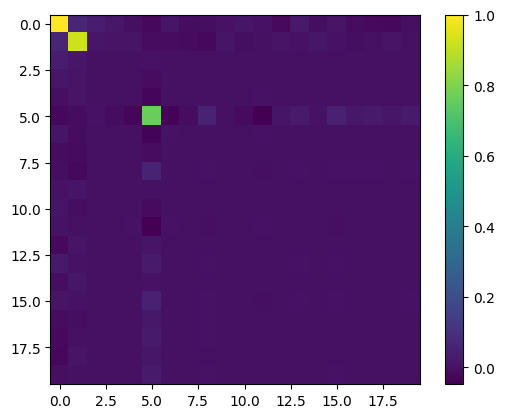

In [18]:
plt.imshow(M)
colorbar = plt.colorbar()

Recall that the M matrix is used to transform the data before applying the outer (laplace) kernel. When only the first, second, and fifth coordinates are relevant to the target function, the M matrix selects these coordinates.